In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from regression import (logreg, utils)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss

C:\Users\chati\AppData\Local\Temp\ipykernel_35720\310087221.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Testing logreg.py implementation

test_prediction

In [137]:
# initialize
log_model=logreg.LogisticRegressor(num_feats=3, learning_rate=0.1, tol=0.01, max_iter=10000, batch_size=10)

In [138]:
# get a set of weights and the x_vector, assign these manually
# weights=np.array([-1.41243788, -0.18130843,  1.3722178 ,  0.95750598]) # derived from W = np.random.randn(num_feats + 1).flatten(); num_feats=3
weights=log_model.W # get array of weights, which are randomly generated in the model
x_vector=np.array([-0.1536077, -0.73873096, 0.69515697, 1]) # manually set x_vector
# x_vector=np.array([0, 0, 0, 0]) # manually set x_vector - at all zeroes, we get 0.5

In [139]:
log_model.make_prediction(x_vector)

0.3056115460272269

In [140]:
# manually compute that make predictions is returning the sigmoid transformation of the linear combination between the x_vector and weights
z=sum(np.multiply(weights, x_vector))
predicted_prob=1/(1+np.exp(-z))
predicted_prob

0.3056115460272269

test_loss_function

In [141]:
# compare our loss function to sklearn's loss function

# create manual dataset; data from https://www.pinecone.io/learn/cross-entropy-loss/
y_true=np.array([0,1,1,0,0,1,1])
y_pred=np.array([0.07,0.91,0.74,0.23,0.85,0.17,0.94])


In [142]:
# initialize
log_model=logreg.LogisticRegressor(num_feats=3, learning_rate=0.1, tol=0.01, max_iter=10000, batch_size=10)

In [143]:
print(log_loss(y_true, y_pred))
print(log_model.loss_function(y_true, y_pred))


0.6371862085371784
0.6371862085371784


test_gradient

In [ ]:
# test dimensions of gradient

In [161]:
# initialize
log_model=logreg.LogisticRegressor(num_feats=2, learning_rate=0.1, tol=0.01, max_iter=10000, batch_size=10)

In [195]:
# get initialized weights from our model and manually generate x_vector
weights=log_model.W # get array of weights, which are randomly generated in the model
x_vector=np.array([[-0.1536077, 0.69515697, 1], 
                   [-0.534536, 0.034259, 1]]) # manually set x_vector
# x_vector=np.array([[0, 0, 1], 
#                    [0, 0, 1]]) # manually set x_vector

y_true=np.array([1, 0]) # define 

In [196]:
# manually compute weight gradient
z=np.sum(np.multiply(weights, x_vector), axis=1)
y_pred=1/(1+np.exp(-z))
difference=y_pred-y_true
dot_out=np.dot(difference, x_vector)
weight_gradient=(1/len(y_true))*(dot_out)
print(weight_gradient)
print(log_model.calculate_gradient(y_true, x_vector))

[0. 0. 0.]
[0. 0. 0.]


test_training

In [5]:
# Load data
X_train, X_val, y_train, y_val = utils.loadDataset(
    features=[
        'Penicillin V Potassium 500 MG',
        'Computed tomography of chest and abdomen',
        'Plain chest X-ray (procedure)',
        'Low Density Lipoprotein Cholesterol',
        'Creatinine',
        'AGE_DIAGNOSIS'
    ],
    split_percent=0.8,
    split_seed=42
)

# Scale the data, since values vary across feature. Note that we
# fit on the training data and use the same scaler for X_val.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

# initialize model and train
log_model = logreg.LogisticRegressor(num_feats=6, learning_rate=0.1, tol=0.01, max_iter=10000, batch_size=10)
log_model.train_model(X_train, y_train, X_val, y_val)

# get history of weights 
weight_hist=np.array(log_model.weight_hist)

# get all adjacent pairs of indices within our weight history, we are aiming to compare each weight vector with the next vector to see if they are different (indicating that they are updating during training)
pairs=[(i,i+1) for i in range(len(weight_hist)) if (i+1<len(weight_hist))]

# check if the next array is equal for set of all weights (should be all False)
updating_weight_hist=[np.array_equal(weight_hist[p[0]], weight_hist[p[1]]) for p in pairs]

# check that our array contains only false
not any(updating_weight_hist)


#### Random function testing

In [93]:
num_feats=6
W = np.random.randn(num_feats + 1).flatten()

In [94]:
def sigmoid(x, b0, b1):
    z=b0 + b1*x
    return 1/(1+np.exp(-z))

def sigmoid_reformat(x, b0, b1):
    z=b0 + b1*x
    return np.exp(z)/(1+np.exp(z))

def simple_sigmoid(z):
    return 1/(1+np.exp(-z))

# takes in matrix of features where rows represent samples and columns represent features and computes the sigmoidal output for each (probability of each sample)
def multivar_sigmoid(X, W):
    px=[simple_sigmoid(np.sum(np.multiply(x, W))) for x in X]
    return px

def binarize_values(Y, threshold=0.5):
    Y_bin=[1 if y>=threshold else 0 for y in Y]
    return Y_bin


In [95]:
x=2
b0, b1=-0.27830945,  0.04422344
print(sigmoid(x, b0, b1))
print(sigmoid_reformat(x, b0, b1))

0.45267643135815605
0.45267643135815605


In [96]:
# features = ['Penicillin V Potassium 500 MG','Computed tomography of chest and abdomen','Plain chest X-ray (procedure)', 'Low Density Lipoprotein Cholesterol','Creatinine','AGE_DIAGNOSIS']
# X,y=utils.loadDataset(features, split_percent=None, split_seed=42)

In [97]:
X_train, X_val, y_train, y_val = utils.loadDataset(
    features=[
        'Penicillin V Potassium 500 MG',
        'Computed tomography of chest and abdomen',
        'Plain chest X-ray (procedure)',
        'Low Density Lipoprotein Cholesterol',
        'Creatinine',
        'AGE_DIAGNOSIS'
    ],
    split_percent=0.8,
    split_seed=42
)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])


In [98]:
def make_prediction(X, W):
    # Z=[np.sum(np.multiply(x, W)) for x in X]
    # px=[1/(1+np.exp(-z)) for z in Z]
    # y_pred=[1 if y>=0.5 else 0 for y in px]
    # return np.array(y_pred)
    y_pred=1/(1+np.exp(-X@W))
    return y_pred


In [99]:
def loss_function(y_true, y_pred):
    # py=sum(y_pred)/len(y_pred)
    # Hy=[y*np.log(py)+(1-y)*np.log(1-py) for y in y_true]
    # Hy=(-1/len(y_pred))*sum(Hy)
    # Hy=-np.mean(y_true*np.log((y_pred+0.0000001))+(1-y_true)*np.log(1-y_pred+0.0000001))
    Hy=(-1/len(y_true))*(np.transpose(y_true)@np.log(y_pred) + np.transpose(1-y_true)@np.log(1-y_pred))
    return Hy

In [100]:
def calculate_gradient(y_true, X):
    Z=[np.sum(np.multiply(x, W)) for x in X]
    px=[1/(1+np.exp(-z)) for z in Z]
    weight_gradient=np.dot(np.array([yhat-y for yhat, y in zip(px, y_true)]), X)
    return weight_gradient

In [101]:
num_feats=6
W = np.random.randn(num_feats + 1).flatten()

In [102]:
h=1/(1+np.exp(-X_train@W))
c=1e-7
y_pred=[1+c if y>=0.5 else 0+c for y in h]
cost = (-1/len(y_train))*(np.transpose(y_train)@np.log(h) + np.transpose(1-y_train)@np.log(1-h))
print(cost)

1.2216554416706782


In [103]:
weight_gradient=X_train.T@(h-y_train)
weight_gradient=(1/len(y_train))*weight_gradient
print(weight_gradient)

[-0.0434792  -0.33376734 -0.24203815  0.          0.         -0.05563556
 -0.24411354]


In [104]:
Z=[np.sum(np.multiply(x, W)) for x in X_train]
px=[1/(1+np.exp(-z)) for z in Z]
(px-y_train) @ X_train


array([ -69.56671993, -534.02774624, -387.26104058,    0.        ,
          0.        ,  -89.01689485, -390.58167111])

In [105]:
# reference for testing: https://www.pinecone.io/learn/cross-entropy-loss/
Z=[np.sum(np.multiply(x, W)) for x in X_train]
px=np.array([1/(1+np.exp(-z)) for z in Z])
t = np.float_(y_train)
p = np.float_(px)

# y_pred=[1 if y>=0.5 else 0 for y in px]
# t = np.float_(y_train)
# p = np.float_(y_pred)
-np.mean(t * np.log(p + 0.0000001) + (1 - t) * np.log(1 - p + 0.0000001))


t = [0,1,1,0,0,1,1]
p = [0.07,0.91,0.74,0.23,0.85,0.17,0.94]
# p=[0,1,1,0,0,1,1]
t = np.float_(t)
p = np.float_(p)

-np.mean(t * np.log(p) + (1 - t) * np.log(1 - p))





0.6371862085371784

In [107]:

t = np.array([0,1,1,0,0,1,1])
p = np.array([0.07,0.91,0.74,0.23,0.85,0.17,0.94])
print(log_loss(t, p, normalize=True))
print(loss_function(t, p))


0.6371862085371784
0.6371862085371784


In [108]:
y_pred=make_prediction(X_train, W)
print(log_loss(y_train, y_pred, normalize=True))
print(loss_function(y_train, y_pred))


1.221655441670678
1.2216554416706782


In [109]:
# https://stackoverflow.com/questions/67615051/implementing-binary-cross-entropy-loss-gives-different-answer-than-tensorflows
y_pred=make_prediction(X_train, W)
y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)
Hy = -np.mean((1-y_train) * np.log(1-y_pred) + y_train * np.log(y_pred))
print(Hy)

0.758595289762377


In [74]:
y_pred=make_prediction(X_train, W)
loss_function(y_train, y_pred)


0.7585950417269135

In [82]:
y_pred=make_prediction(X_train, W)
(log_loss(y_train, y_pred, normalize=False))/len(y_train)

0.758595289762377

In [83]:
num_feats=6
W = np.random.randn(num_feats + 1).flatten()
y_pred=make_prediction(X_train, W)
# loss_function(y_train, y_pred)
Z=[np.sum(np.multiply(x, W)) for x in X_train]
px=np.array([1/(1+np.exp(-z)) for z in Z])
-np.mean(y_train*np.log(px)+(1-y_train)*np.log(1-px))


1.0649528681722404

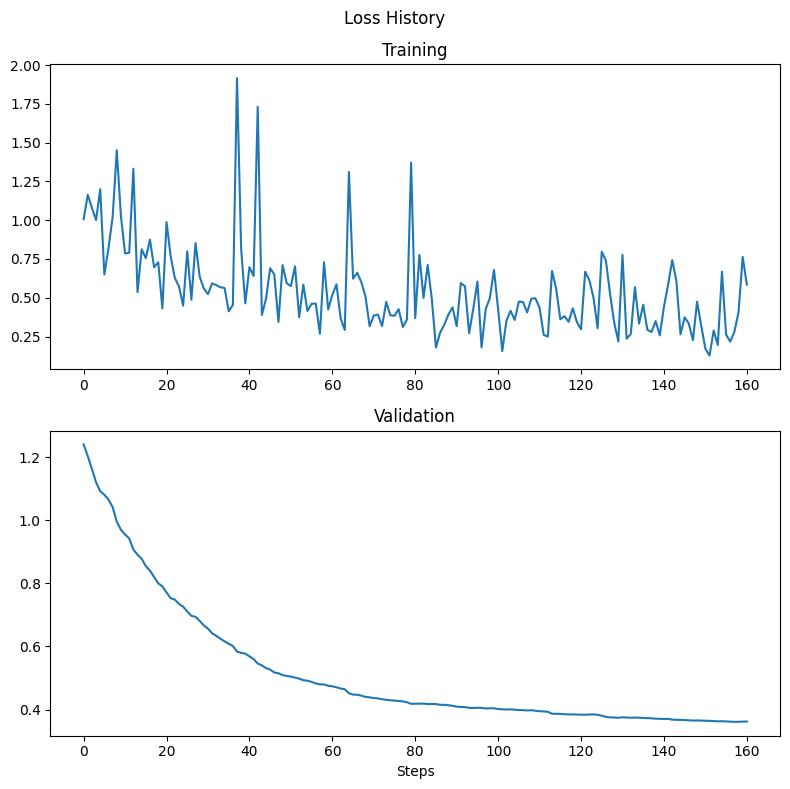

In [4]:

# Load data
X_train, X_val, y_train, y_val = utils.loadDataset(
    features=[
        'Penicillin V Potassium 500 MG',
        'Computed tomography of chest and abdomen',
        'Plain chest X-ray (procedure)',
        'Low Density Lipoprotein Cholesterol',
        'Creatinine',
        'AGE_DIAGNOSIS'
    ],
    split_percent=0.8,
    split_seed=42
)

# Scale the data, since values vary across feature. Note that we
# fit on the training data and use the same scaler for X_val.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

# For testing purposes, once you've added your code.
# CAUTION: hyperparameters have not been optimized.
log_model = logreg.LogisticRegressor(num_feats=6, learning_rate=0.1, tol=0.01, max_iter=10000, batch_size=10)
log_model.train_model(X_train, y_train, X_val, y_val)
log_model.plot_loss_history()


In [7]:
log_model.reset_model()